Task: Predicting Sina Weibo Interaction Behaviours

# Import

In [53]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_table('./data/weibo_train_data.txt', header=None, sep='\t')      # training
df2 = pd.read_table('./data/weibo_predict_data.txt', header=None, sep='\t')   # predicting

# Exploration

### Structure

In [56]:
df.columns = ['uid', 'mid', 'time', 'forward', 'comment', 'like', 'content']
df2.columns = ['uid', 'mid', 'time', 'content']
df.head()

,uid,mid,time,forward,comment,like,content
0,d38e9bed5d98110dc2489d0d1cac3c2a,7d45833d9865727a88b960b0603c19f6,2015-02-23 17:41:29,0,0,0,丽江旅游(sz002033)#股票##炒股##财经##理财##投资#推荐包赢股，盈利对半分成...
1,fa13974743d3fe6ff40d21b872325e9e,8169f1d45051e08ef213bf1106b1225d,2015-02-14 12:49:58,0,0,0,#丁辰灵的红包#挣钱是一种能力，抢红包拼的是技术。我抢到了丁辰灵 和@阚洪岩 一起发出的现金...
2,da534fe87e7a52777bee5c30573ed5fd,68cd0258c31c2c525f94febea2d9523b,2015-03-31 13:58:06,0,0,0,淘宝网这些傻逼。。。气的劳资有火没地儿发~尼玛，你们都瞎了
3,e06a22b7e065e559a1f0bf7841a85c51,00b9f86b4915aedb7db943c54fd19d59,2015-06-11 20:39:57,0,4,3,看点不能说的，你们都懂[笑cry]
4,f9828598f9664d4e347ef2048ce17734,c7f6f66044c0c5a3330e2c5371be6824,2015-03-10 18:02:38,0,0,0,111多张


### Statistics

In [57]:
def describe(df, stats): # additional parameters
    d = df.describe()
    return d.append(df.reindex(d.columns, axis="columns").agg(stats))

describe(df, ['skew', 'mad', 'kurt']).round(3)

,forward,comment,like
count,1225088.000,1225088.000,1225088.000
mean,3.541,1.257,2.217
std,85.285,19.333,41.264
min,0.000,0.000,0.000
25%,0.000,0.000,0.000
50%,0.000,0.000,0.000
75%,0.000,0.000,1.000
max,41850.000,7467.000,11871.000
skew,193.439,192.929,114.572
mad,6.229,2.030,3.591


### Missing values

In [58]:
df[['forward', 'comment', 'like']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225088 entries, 0 to 1225087
Data columns (total 3 columns):
forward    1225088 non-null int64
comment    1225088 non-null int64
like       1225088 non-null int64
dtypes: int64(3)
memory usage: 28.0 MB


### Duplications

Duplicated records:

In [59]:
len(df[df.duplicated()])

0

Duplicated users:

In [60]:
user_counts = df['uid'][df['uid'].duplicated()].value_counts()

In [61]:
pd.DataFrame(user_counts[:5])

,uid
875a4a77b339d93f819e2c4de5bd0b57,31014
0faddeeabf8b2cfd75afc6ad9c1ba2da,17159
7511e346911dd7d1e38f11485abb25c5,12012
c35d635cd9d875e63fcaff8e4f1398a9,7874
c60533fdb5278412b14379f693f77dd5,7800


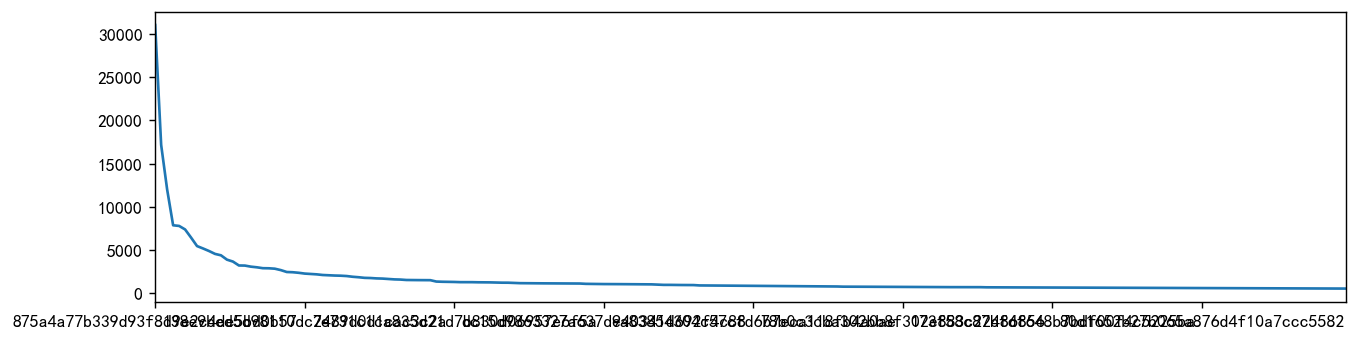

In [62]:

plt.figure(figsize=(12,3), dpi=128)
user_counts[:200].plot()# top 200

### Outliers

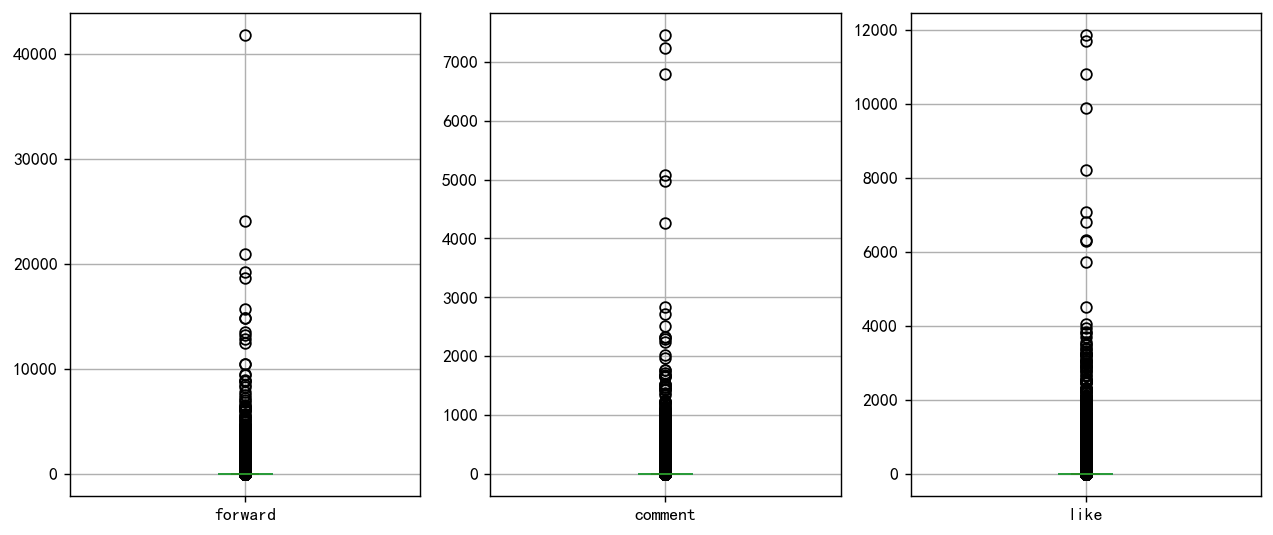

In [63]:

outlier = plt.figure(figsize=(12,5), dpi=128)

for i in range(1,4):
    outlier.add_subplot(1, 3, i)
    df[[['forward', 'comment', 'like'][i-1]]].boxplot()

### Correlation

In [81]:
import numpy as np
corr = df[['forward', 'comment', 'like']].corr()
high_corr = corr[np.abs(corr) > 0.5].fillna(0)
high_corr[np.abs(corr) > 0.5].fillna(0).round(3)

,forward,comment,like
forward,1.000,0.579,0.554
comment,0.579,1.000,0.617
like,0.554,0.617,1.000


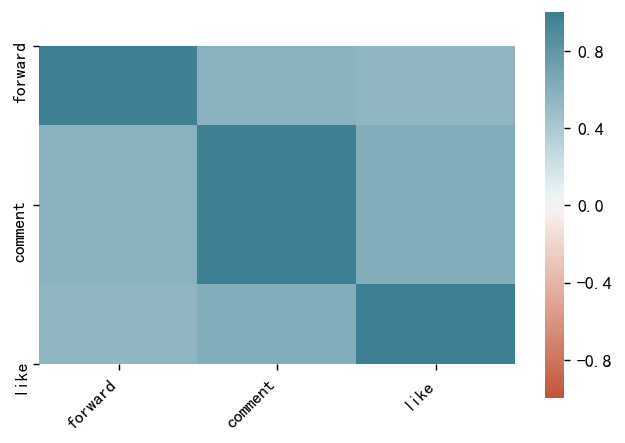

In [82]:
plt.figure(dpi=128)
ax = sns.heatmap(
    high_corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Constants and features

### Constants

General constants are effective predicting values for some tweets.   

#### Mean

Use mean, generally.

In [93]:
forward_mean  =  int(df.forward.mean()) # only integers according to the task description
comment_mean  =  int(df.comment.mean())
like_mean     =  int(df.like.mean())
forward_mean, comment_mean, like_mean

(3, 1, 2)

#### Median

Use median, since high skewness

In [94]:
forward_median  =  int(df.forward.median()) # only integers according to the task description
comment_median  =  int(df.comment.median())
like_median     =  int(df.like.median())
forward_median, comment_median, like_median

(0, 0, 0)

### Features